  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw

====== Epoch:  1 / 10 ======
Batch:  1/6  Loss: 2.303080
Batch:  2/6  Loss: 2.155830
Batch:  3/6  Loss: 1.817984
Batch:  4/6  Loss: 1.296692
Batch:  5/6  Loss: 1.015639
Batch:  6/6  Loss: 0.748329
Accuracy: 68.22%
elapsed time: 6.924820899963379
====== Epoch:  2 / 10 ======
Batch:  1/6  Loss: 1.053456
Batch:  2/6  Loss: 0.591802
Batch:  3/6  Loss: 0.685651
Batch:  4/6  Loss: 0.592265
Batch:  5/6  Loss: 0.488971
Batch:  6/6  Loss: 0.475124
Accuracy: 84.24%
elapsed time: 6.9428627490997314
====== Epoch:  3 / 10 ======
Batch:  1/6  Loss: 0.468769
Batch:  2/6  Loss: 0.423077
Batch:  3/6  Loss: 0.373397
Batch:  4/6  Loss: 0.361498
Batch:  5/6  Loss: 0.342742
Batch:  6/6  Loss: 0.334552
Accuracy: 91.47%
elapsed time: 6.933735609054565
====== Epoch:  4 / 10 ======
Batch:  1/6  Loss: 0.299126
Batch:  2/6  Loss: 0.274136
Batch:  3/6  Loss: 0.234451
Batch:  4/6  Loss: 0.266808
Batch:  5/6  Loss: 0.239268
Batch:  6

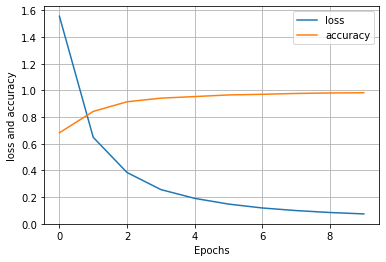

In [1]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch
import matplotlib.pyplot as plt
import time

mnist_train = datasets.MNIST(root='MNIST_data/',
                             train=True,
                             transform=transforms.ToTensor(),
                             download=True)

mnist_test = datasets.MNIST(root='MNIST_data/',
                             train=False,
                             transform=transforms.ToTensor(),
                             download=True)

BATSIZE = 10000
train_loader = DataLoader(dataset=mnist_train,
                          batch_size=BATSIZE,
                          shuffle=True,
                          num_workers=0)
test_loader = DataLoader(dataset=mnist_test,
                          batch_size=len(mnist_test),
                          shuffle=False,
                          num_workers=0)

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.cnv1 = torch.nn.Conv2d(in_channels=1, 
                                    out_channels=16,
                                    kernel_size=5,
                                    stride=1,
                                    padding=0)
        self.cnv2 = torch.nn.Conv2d(in_channels=16, 
                                    out_channels=32,
                                    kernel_size=5,
                                    stride=1,
                                    padding=0)

        self.fc = torch.nn.Linear(512, 10)

        self.mp = torch.nn.MaxPool2d(2)        
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        x = self.relu(self.mp(self.cnv1(x)))
        x = self.relu(self.mp(self.cnv2(x)))

        x = x.view(-1, 512)
        z = self.fc(x)
        return z

net = Net()

cel = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)


EPOCHS = 10
loss_lst = []
acc_lst = []

start_time = time.time()
for epoch in range(EPOCHS):
    batch_time = time.time()
    print(f'====== Epoch: {epoch+1:2d} / {EPOCHS} ======')
    net.train()
    l_sum = 0
    for batch_idx, (x,y) in enumerate(train_loader):
        z = net(x)
        loss = cel(z, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        l_sum += loss.item()
        print(f'Batch: {batch_idx+1:2d}/{len(train_loader)} ',
              f'Loss: {loss.item():0.6f}')        
    loss_lst.append(l_sum/len(train_loader))

    net.eval()
    with torch.no_grad():
        correct = 0
        for batch_idx, (x,y) in enumerate(test_loader):
            z = net(x)
            yhat = torch.argmax(z, dim=1)
            correct += torch.sum(y==yhat)
    
    accuracy = correct / len(mnist_test)
    acc_lst.append(accuracy)
    
    print(f'Accuracy: {accuracy.item()*100:0.2f}%')
    print("elapsed time:", time.time() - batch_time)
        
print("elapsed time:", time.time() - start_time)

plt.plot(range(EPOCHS), loss_lst)
plt.plot(range(EPOCHS), acc_lst)
plt.xlabel('Epochs')
plt.ylabel('loss and accuracy')
plt.legend(['loss', 'accuracy'])
plt.grid(True)
plt.show()